In [1]:
import sys
import csv
import io
import math
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

sys.path.append('../bin')
from bin.functions import *
np.seterr(divide = 'ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
df_yres = pd.read_csv("year_res.csv")
df_yres

,V1,perm_ent3,perm_ent4,mse,mape,sym_test
0,Y1,0.697843,0.539401,5.165229e+04,0.026386,False
1,Y2,0.816579,0.705971,2.386951e+05,0.375479,False
2,Y3,0.000000,0.000000,8.157110e+04,0.028990,False
3,Y4,0.166740,0.144179,2.599992e+05,0.048794,False
4,Y5,0.478736,0.395644,9.007663e+04,0.032563,False
...,...,...,...,...,...,...
22995,Y22996,0.573126,0.449256,7.026910e+06,0.774407,False
22996,Y22997,0.783529,0.629254,1.140939e+07,1.495124,True
22997,Y22998,0.920599,0.721641,5.865997e+05,0.351883,True
22998,Y22999,0.846391,0.739619,2.357702e+07,2.094189,False


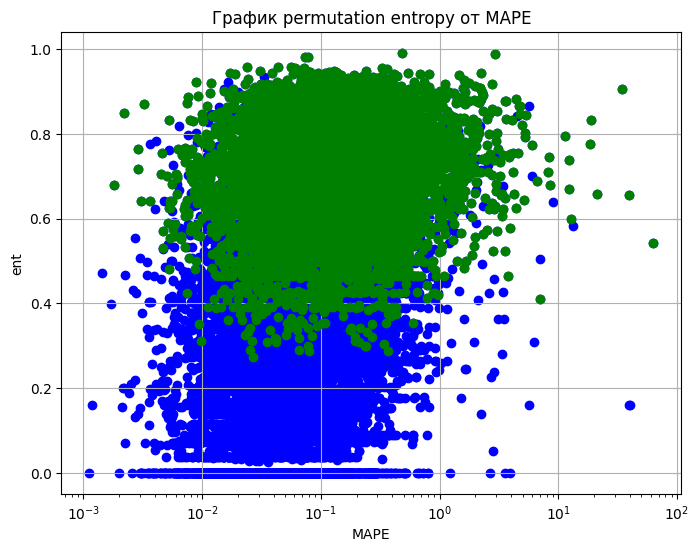

In [3]:
df_sorted = df_yres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mape'], df_sorted["perm_ent3"], color='green')
plt.semilogx()
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

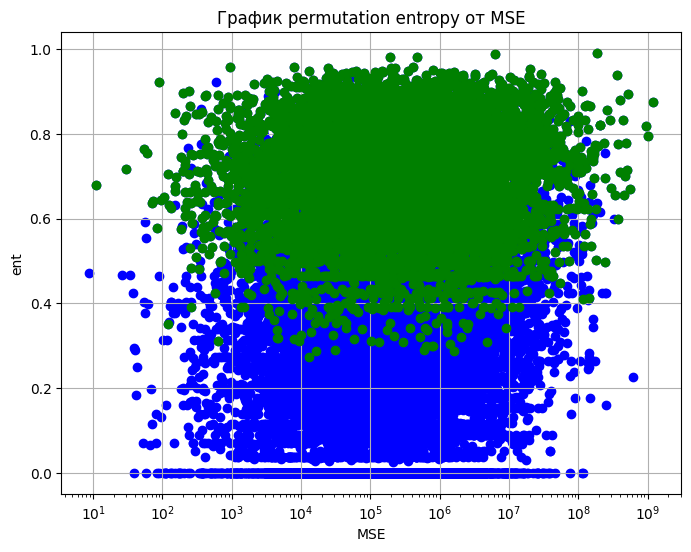

In [5]:
df_sorted = df_yres.sort_values(by='mse', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mse'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mse'], df_sorted["perm_ent3"], color='blue')
plt.title('График permutation entropy от MSE')
plt.semilogx()
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [6]:
df_mres = pd.read_csv("month_res.csv")

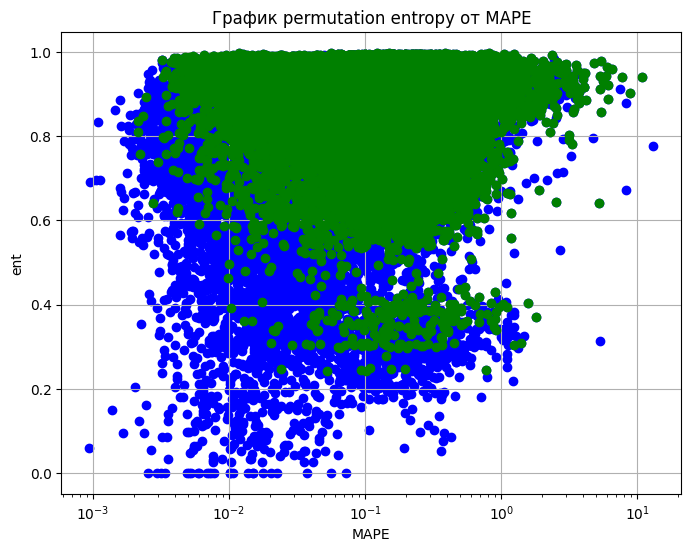

In [7]:
df_sorted = df_mres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mape'], df_sorted["perm_ent3"], color='green')
plt.semilogx()
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

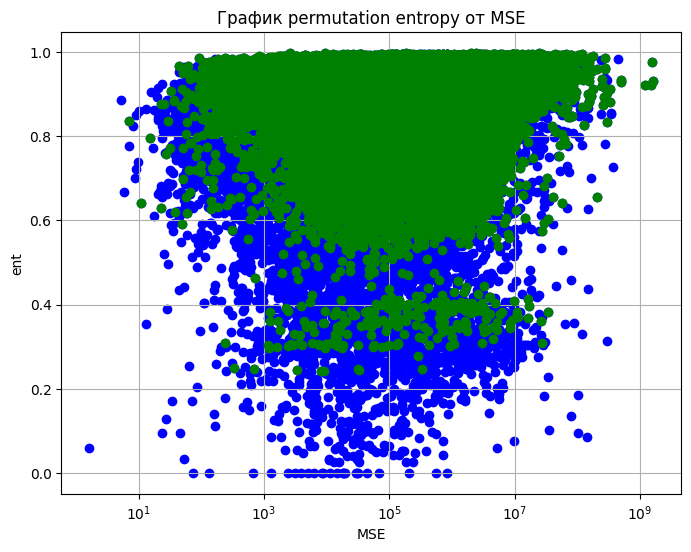

In [8]:
df_sorted = df_mres.sort_values(by='mse', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mse'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mse'], df_sorted["perm_ent3"], color='blue')
plt.title('График permutation entropy от MSE')
plt.semilogx()
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [31]:

df = []
symdf = []
for k in range(5, 100, 5):
    df_sorted = df_mres[df_mres["perm_ent4"] <= k/100]
    df_sorted = df_sorted[df_sorted["perm_ent4"] > (k-5)/100]
    df.append(df_sorted.loc[df_sorted['sym_test'] == False])
    symdf.append(df_sorted.loc[df_sorted['sym_test']])



In [23]:
df[0]

,V1,perm_ent4,mse,mape,sym_test
468,M469,0.044899,33306.567136,0.014782,False
2737,M2738,0.033855,11086.651458,0.008895,False
5802,M5803,0.032572,53.303057,0.003548,False
13500,M13501,0.031988,11054.668714,0.007634,False
28039,M28040,0.044215,145175.948466,0.033142,False
28040,M28041,0.044215,720421.164159,0.063141,False
30350,M30351,0.033855,30210.723933,0.014518,False
30395,M30396,0.026397,187504.350610,0.035860,False
30585,M30586,0.026397,15859.451735,0.010263,False
30593,M30594,0.026397,239117.829955,0.041537,False


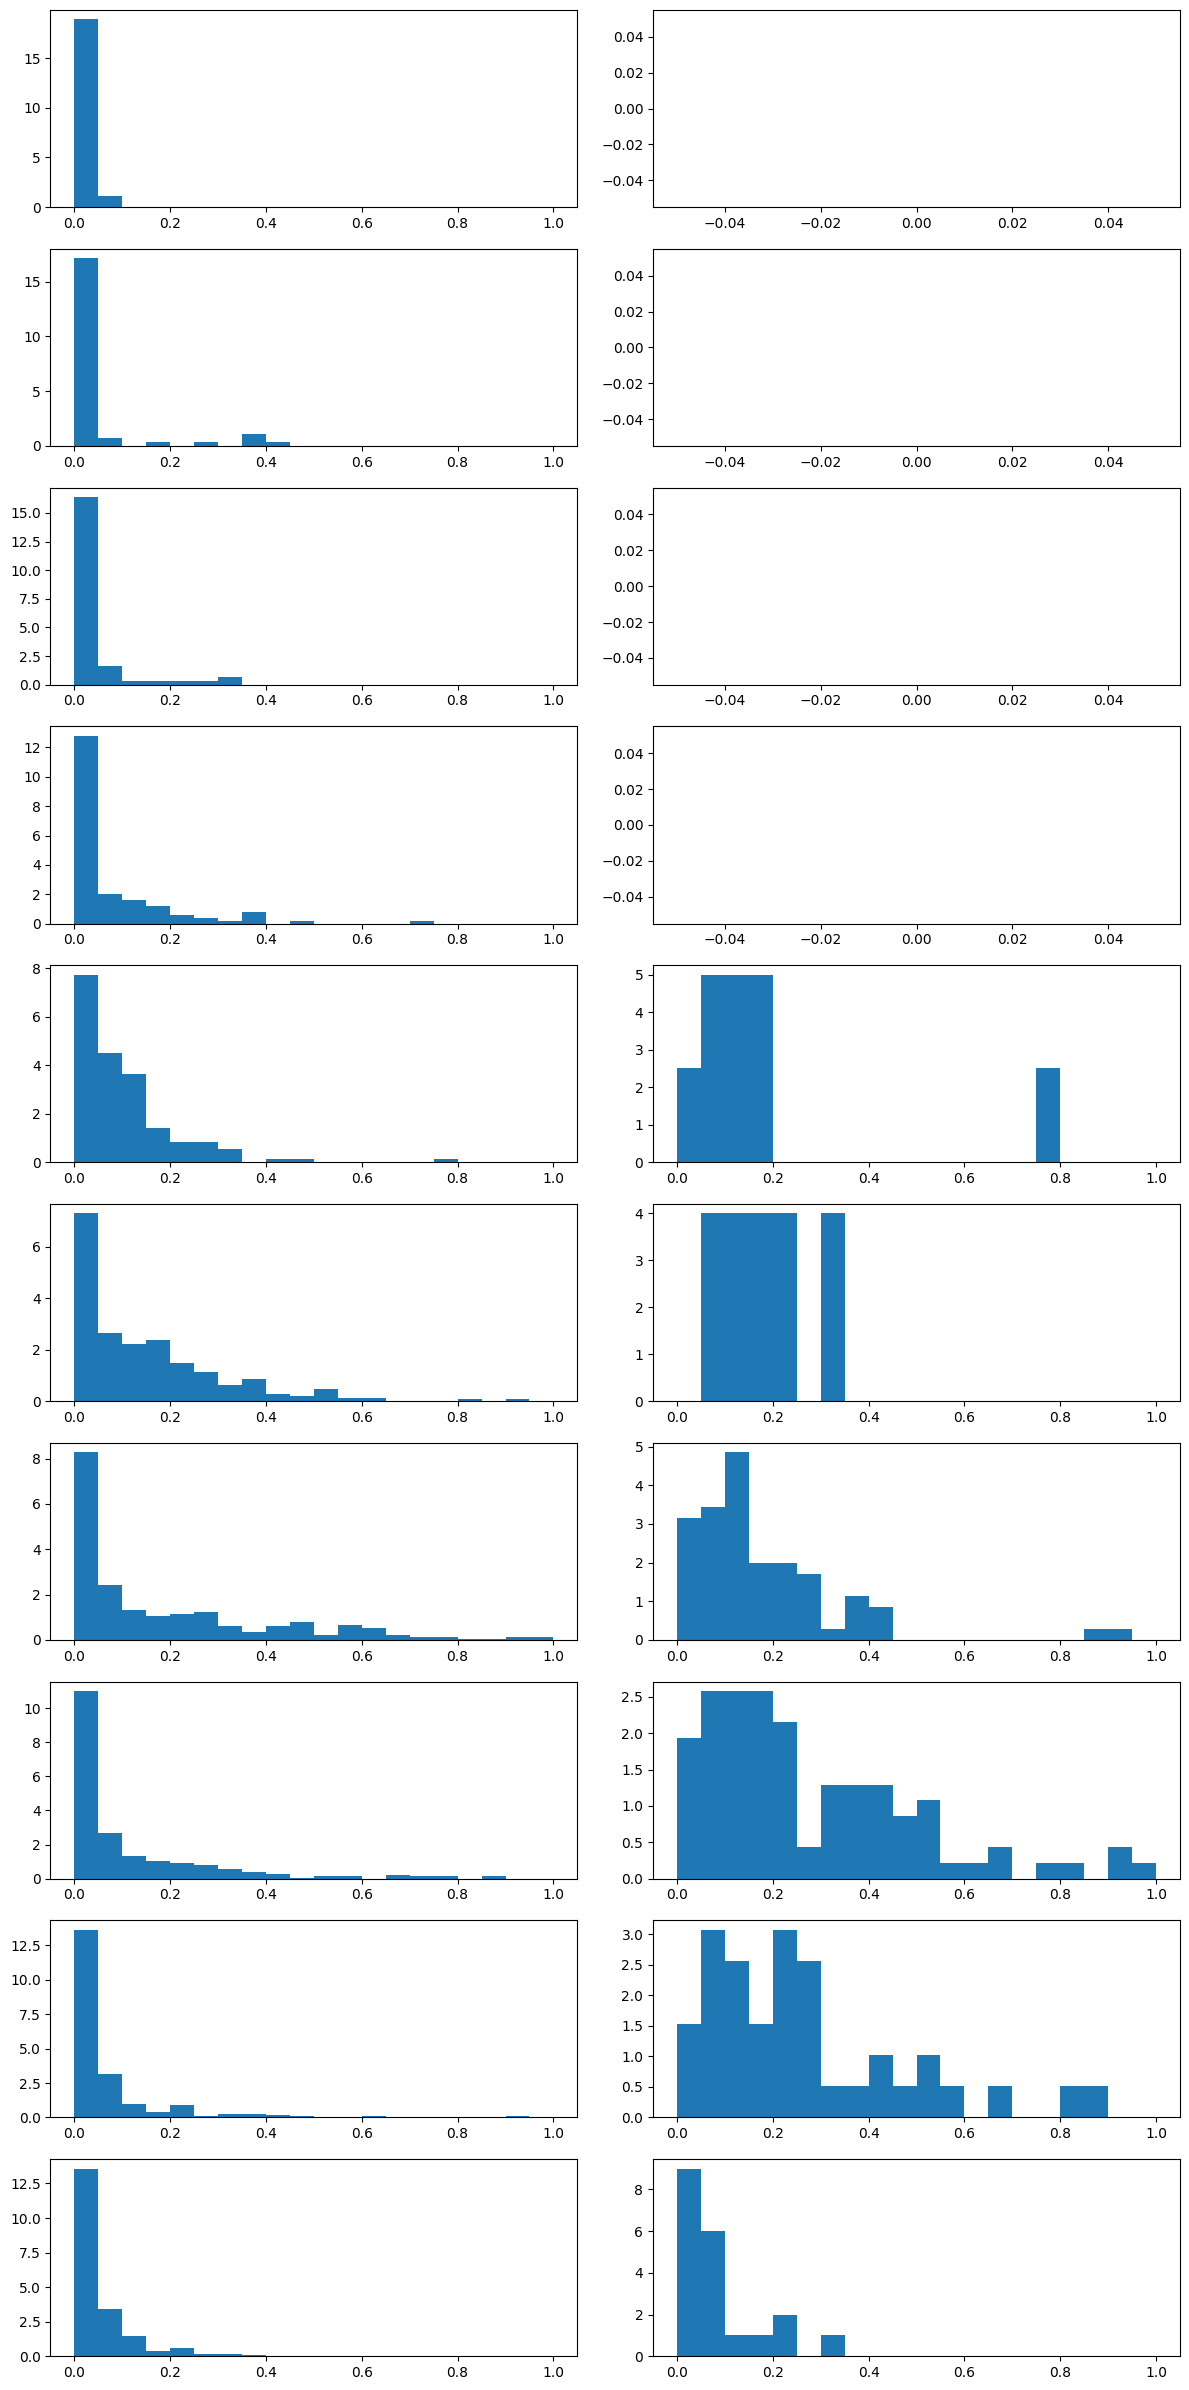

In [32]:
fig, axs = plt.subplots(10, 2, figsize=(12, 24))
for i in range(10):
        axs[i, 0].hist(df[i]["mape"], bins = 20, range =(0, 1), density = True)
        axs[i, 1].hist(symdf[i]["mape"], bins = 20, range = (0,1), density = True)

plt.tight_layout()
plt.show()